In [2]:
# !pip uninstall mediapipe -y
!pip install mediapipe==0.10.13



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip show mediapipe

Name: mediapipe
Version: 0.10.21
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: absl-py, attrs, flatbuffers, jax, jaxlib, matplotlib, numpy, opencv-contrib-python, protobuf, sentencepiece, sounddevice
Required-by: 


In [260]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

## 1. Define MediaPipe functions and its utilities

In [205]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh


In [207]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [209]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [211]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [213]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, 
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, 
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, 
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, 
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


## 2. Real Time MediaPipe

In [140]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    # cv2.waitKey(100)  # Let the GUI process any remaining events
    cv2.destroyAllWindows()


I0000 00:00:1754657453.116669 23760606 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1754657453.190488 24683110 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754657453.206856 24683110 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754657453.208911 24683111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754657453.208938 24683113 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754657453.209030 24683110 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disablin

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
draw_landmarks(frame,results)

NameError: name 'frame' is not defined

In [49]:
import numpy as np
import cv2
from PIL import Image
import glob
import os

folder_path = '/Users/badershalata/Documents/MP_Data/hello/25/'

# Automatically get sorted list of all .npy files in the folder
landmark_files = sorted(glob.glob(os.path.join(folder_path, '*.npy')),
                        key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

img_h, img_w = 480, 640
frames = []

def draw_points_bold(image, points, color, radius=6):
    for lm in points:
        x_pix = int(lm[0] * img_w)
        y_pix = int(lm[1] * img_h)
        # Draw black border circle (thicker radius)
        cv2.circle(image, (x_pix, y_pix), radius + 2, (0, 0, 0), -1)
        # Draw colored circle on top
        cv2.circle(image, (x_pix, y_pix), radius, color, -1)

for file in landmark_files:
    landmarks = np.load(file)
    
    pose = landmarks[:33*4].reshape(33,4)
    face = landmarks[33*4:33*4 + 468*3].reshape(468,3)
    lh = landmarks[33*4 + 468*3 : 33*4 + 468*3 + 21*3].reshape(21,3)
    rh = landmarks[33*4 + 468*3 + 21*3 :].reshape(21,3)
    
    image = np.zeros((img_h, img_w, 3), dtype=np.uint8)
    
    draw_points_bold(image, pose[:, :2], (255, 0, 255))    # Purple
    draw_points_bold(image, face[:, :2], (0, 165, 255))    # Orange
    draw_points_bold(image, lh[:, :2], (255, 255, 255))    # White
    draw_points_bold(image, rh[:, :2], (255, 255, 0))      # Cyan
        # Red with border
    
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(rgb_image)
    frames.append(pil_img)

# Save frames as GIF
frames[0].save('landmarks_animation.gif', save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)


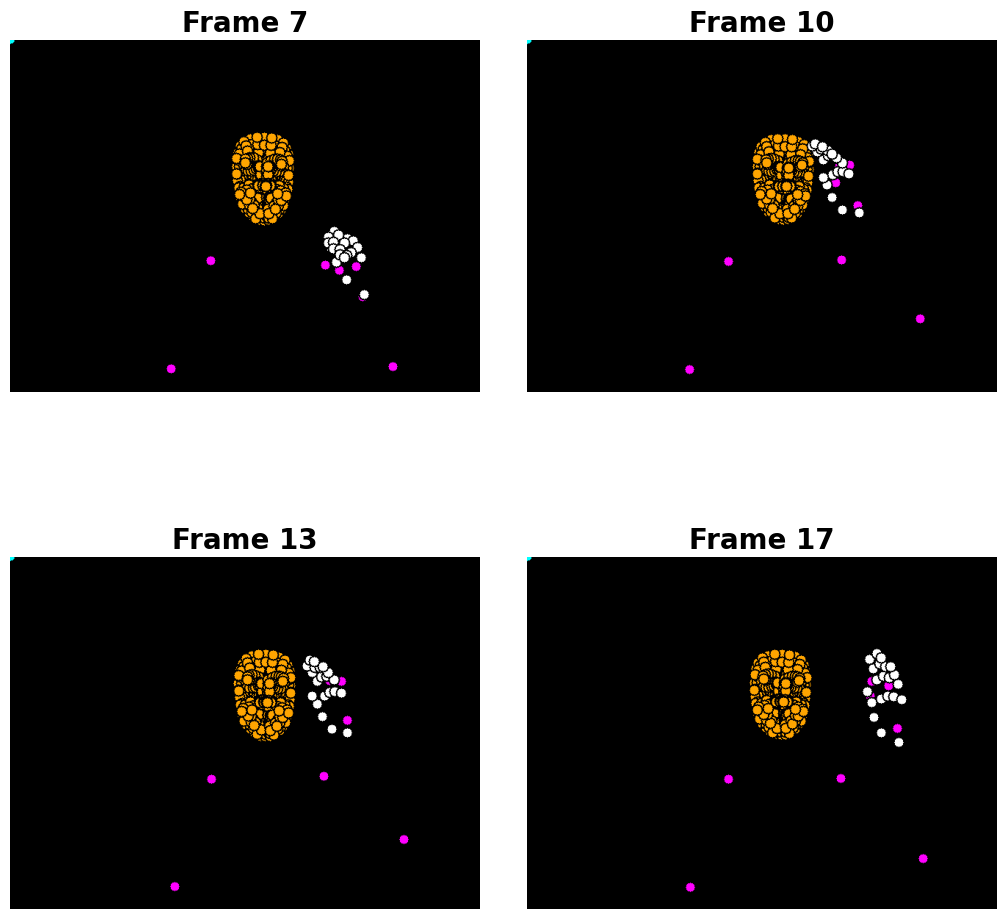

In [83]:
import matplotlib.pyplot as plt

selected_indices = [7, 10, 13, 17
                   ]

plt.figure(figsize=(10, 10))

for i, idx in enumerate(selected_indices):
    plt.subplot(2, 2, i + 1)
    plt.imshow(frames[idx])
    plt.title(f'Frame {idx}', fontsize=20, fontweight='bold')
    plt.axis('off')

plt.tight_layout(pad=0.5)      # reduce padding around subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # reduce space between subplots

plt.show()


## 3. Extract Keypoint values

In [215]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)
result_test.shape

NameError: name 'results' is not defined

## 4. Setup Folders

In [217]:
import os
import numpy as np

# Get your user's Documents directory
from pathlib import Path
DOCUMENTS_PATH = Path.home() / "Documents"

# Set full path to MP_Data inside Documents
DATA_PATH = os.path.join(DOCUMENTS_PATH, 'MP_Data')

# Define actions and setup
actions = np.array(['hello', 'thanks', 'iloveyou', 'go', 'why','when', 'eat', 'today', 'help',
                    'friend', 'goodbye','understand',"don't-understand",
                    
                    "i'm-good", 'how-are-you', 'my-name-is', 'good-morning', 
                    'see-you-later'])
# DO: WHEN, GOODBYE, HELP, FRIEND
# actions = np.array(["understand1"])
no_sequences = 30
sequence_length = 30

# # # Create folders for each action and sequence
# for action in actions: 
#     action_path = os.path.join(DATA_PATH, action)

# #     # Ensure action folder exists first (if it's the first time)
#     os.makedirs(action_path, exist_ok=True)

# #     # Get highest existing sequence number to avoid overwriting
#     existing = [int(name) for name in os.listdir(action_path) if name.isdigit()]
#     dirmax = max(existing) if existing else 0

#     for sequence in range(1, no_sequences + 1):
#         try: 
#             os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
#         except FileExistsError:
#             pass


## 5. Collect Data

In [214]:
start_folder = dirmax + 1
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in [actions[0]]:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                ### HERE FOR GOSON
                # npy_path = os.path.join(DATA_PATH, action, f'gosonand_{action}', str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1753961106.518364 15264735 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro


In [210]:
import os

# Path to the main folder
base_path = "/Users/badershalata/Documents/MP_Data/understand1"  # 🔁 Replace with your actual path

# Loop through subfoders named "1" to "50"
for i in range(1, 21):
    old_name = os.path.join(base_path, str(i))
    new_name = os.path.join(base_path, str(i + 132))
    
    if os.path.exists(old_name):
        os.rename(old_name, new_name)
        print(f"Renamed: {old_name} → {new_name}")
    else:
        print(f"Skipped (not found): {old_name}")


Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/1 → /Users/badershalata/Documents/MP_Data/goodbye1/133
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/2 → /Users/badershalata/Documents/MP_Data/goodbye1/134
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/3 → /Users/badershalata/Documents/MP_Data/goodbye1/135
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/4 → /Users/badershalata/Documents/MP_Data/goodbye1/136
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/5 → /Users/badershalata/Documents/MP_Data/goodbye1/137
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/6 → /Users/badershalata/Documents/MP_Data/goodbye1/138
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/7 → /Users/badershalata/Documents/MP_Data/goodbye1/139
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/8 → /Users/badershalata/Documents/MP_Data/goodbye1/140
Renamed: /Users/badershalata/Documents/MP_Data/goodbye1/9 → /Users/badershalata/Documents/MP_Data/goodbye1/141
R

In [64]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess and Label creation

In [219]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [221]:
label_map = {label:num for num, label in enumerate(actions)}


In [223]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'go': 3,
 'why': 4,
 'when': 5,
 'eat': 6,
 'today': 7,
 'help': 8,
 'friend': 9,
 'goodbye': 10,
 'understand': 11,
 "don't-understand": 12,
 "i'm-good": 13,
 'how-are-you': 14,
 'my-name-is': 15,
 'good-morning': 16,
 'see-you-later': 17}

In [225]:
import os
import numpy as np

sequences, labels = [], []
for action in actions[:18]:
    action_path = os.path.join(DATA_PATH, action)
    
    # Load sequences directly inside the action folder (if any)
    main_sequence_folders = [f for f in os.listdir(action_path) if f.isdigit()]
    for seq_folder in main_sequence_folders:
        seq_path = os.path.join(action_path, seq_folder)
        # Check if the folder contains the expected .npy files for the sequence length
        if all(os.path.exists(os.path.join(seq_path, f"{frame_num}.npy")) for frame_num in range(sequence_length)):
            window = []
            for frame_num in range(sequence_length):
                frame_path = os.path.join(seq_path, f"{frame_num}.npy")
                res = np.load(frame_path)
                window.append(res)
            sequences.append(window)
            # assigning label for the sequence here
            labels.append(label_map[action])
        else:
            # Skip if frames missing
            continue

    # # Check for a subfolder named gosonand_<action>
    # signer_folder = os.path.join(action_path, f"gosonand_{action}")
    # if os.path.exists(signer_folder) and os.path.isdir(signer_folder):
    #     signer_sequence_folders = [f for f in os.listdir(signer_folder) if f.isdigit()]
    #     for seq_folder in signer_sequence_folders:
    #         seq_path = os.path.join(signer_folder, seq_folder)
    #         # Check if folder is empty or missing expected frames
    #         npy_files = [f for f in os.listdir(seq_path) if f.endswith('.npy')]
    #         if len(npy_files) < sequence_length:
    #             # Skip empty or incomplete folders
    #             continue
    #         if all(os.path.exists(os.path.join(seq_path, f"{frame_num}.npy")) for frame_num in range(sequence_length)):
    #             window = []
    #             for frame_num in range(sequence_length):
    #                 frame_path = os.path.join(seq_path, f"{frame_num}.npy")
    #                 res = np.load(frame_path)
    #                 window.append(res)
    #             sequences.append(window)
    #             labels.append(label_map[action])
    #         else:
    #             continue


In [226]:
np.array(sequences).shape

(2470, 30, 1662)

In [227]:
np.array(labels).shape

(2470,)

In [231]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [33]:
print(label_map.keys())


dict_keys(['hello', 'thanks', 'iloveyou', 'go', 'why', 'when', 'eat', 'today', 'help', 'friend', 'goodbye', 'understand', "don't-understand", "i'm-good", 'how-are-you', 'my-name-is', 'good-morning', 'see-you-later'])


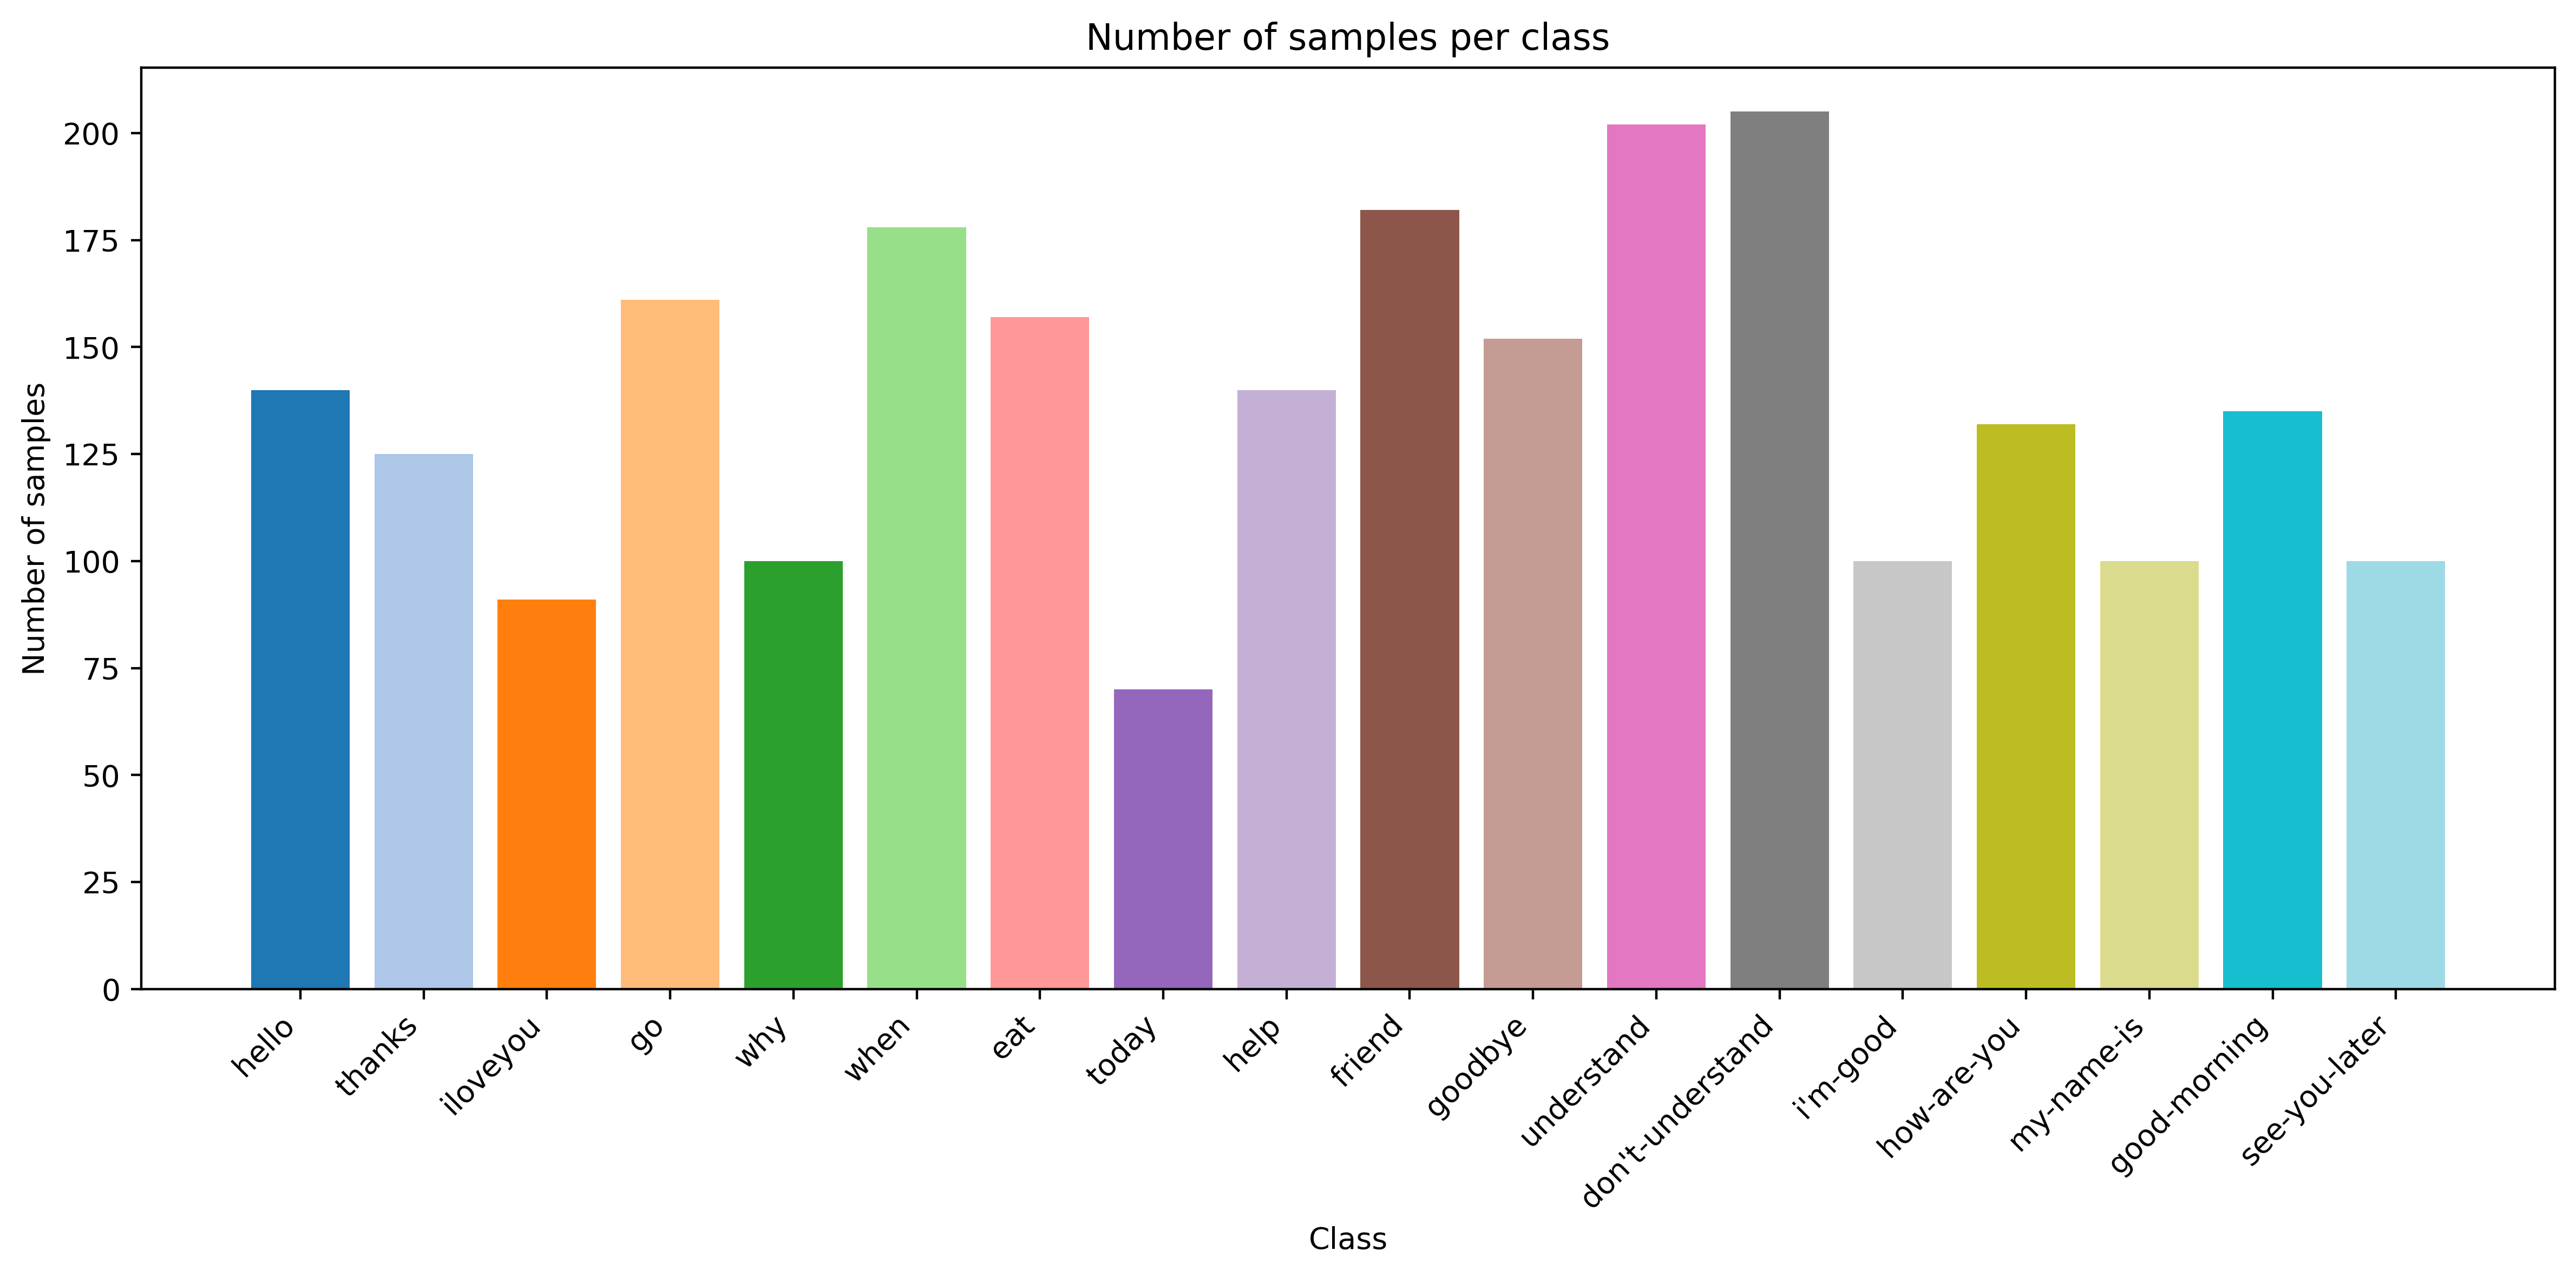

In [81]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

num_to_label = {num: label for label, num in label_map.items()}
labels_named = [num_to_label[label] for label in labels]
label_counts = Counter(labels_named)
classes = list(label_counts.keys())
counts = list(label_counts.values())


# Generate a color palette with as many colors as classes
colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))
plt.figure(figsize=(12, 6), dpi=400)

colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))

plt.bar(classes, counts, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.tight_layout()

plt.savefig('class_distribution.png', dpi=400)  # Save figure with 400 dpi
plt.show()



## 7. Data Split

In [35]:
from sklearn.model_selection import train_test_split

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Second split: from train+val → train and val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

# Summary
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 1666
Validation size: 186
Test size: 618


## 8. Data Augmentation

In [246]:
def augment_mediapipe_frame(flat_keypoints, rotation_deg=5, scale_range=(0.9,1.1), translation_range=0.1, noise_std=0.01):
    # Extract the parts based on your layout
    pose = flat_keypoints[:132].reshape(33, 4)  # includes visibility
    face = flat_keypoints[132:132+1404].reshape(468, 3)
    lh = flat_keypoints[132+1404:132+1404+63].reshape(21, 3)
    rh = flat_keypoints[132+1404+63:].reshape(21, 3)

    def augment_coords(coords):
        # coords shape: (num_keypoints, 3)
        theta = np.radians(np.random.uniform(-rotation_deg, rotation_deg))
        cos_t, sin_t = np.cos(theta), np.sin(theta)
        R = np.array([[cos_t, -sin_t], [sin_t, cos_t]])

        coords[:, :2] = coords[:, :2] @ R.T

        scale = np.random.uniform(*scale_range)
        coords *= scale

        translation = np.random.uniform(-translation_range, translation_range, size=(1,3))
        coords += translation

        noise = np.random.normal(0, noise_std, size=coords.shape)
        coords += noise

        return coords

    # Augment pose spatial coords only (x,y,z), keep visibility unchanged
    pose_spatial = pose[:, :3]
    pose_spatial = augment_coords(pose_spatial)
    pose[:, :3] = pose_spatial

    # Augment other parts
    face = augment_coords(face)
    lh = augment_coords(lh)
    rh = augment_coords(rh)

    # Flatten and re-concatenate everything
    augmented = np.concatenate([
        pose.flatten(),
        face.flatten(),
        lh.flatten(),
        rh.flatten()
    ])

    return augmented
num_augmentations = 10
X_train_augmented = []
y_train_augmented = []

for x, y_label in zip(X_train, y_train):
    X_train_augmented.append(x)
    y_train_augmented.append(y_label)

    for _ in range(num_augmentations):
        augmented_sequence = []
        for frame in x:  # frame shape (1662,)
            frame_aug = augment_mediapipe_frame(frame)
            augmented_sequence.append(frame_aug)
        augmented_sequence = np.array(augmented_sequence)
        X_train_augmented.append(augmented_sequence)
        y_train_augmented.append(y_label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
print(f"original {len(X_train)}")
print(f"Augmented {len(X_train_augmented)}")

original 1666
Augmented 18326


## 9. Model Architecture, Training & Testing

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [235]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [237]:
from tensorflow.keras.layers import Dropout, Masking, Bidirectional, LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh'), input_shape=(30,1662)))
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(64, return_sequences=False, activation = 'tanh')))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions[:18]), activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [248]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tb_callback = TensorBoard(log_dir='logs')

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
    X_train_augmented, y_train_augmented,
    validation_data=(X_val, y_val),
    epochs=360,
    batch_size=64,
    callbacks=[tb_callback, early_stopping]
)

# Model summary
model.summary()

# === Evaluate accuracy on train/val/test ===
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy:      {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")


Epoch 1/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - categorical_accuracy: 0.9469 - loss: 0.1720 - val_categorical_accuracy: 0.9785 - val_loss: 0.1276
Epoch 2/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - categorical_accuracy: 0.9715 - loss: 0.0867 - val_categorical_accuracy: 0.8548 - val_loss: 0.6069
Epoch 3/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - categorical_accuracy: 0.9699 - loss: 0.0958 - val_categorical_accuracy: 0.9516 - val_loss: 0.2524
Epoch 4/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 37s 130ms/step - categorical_accuracy: 0.9851 - loss: 0.0473 - val_categorical_accuracy: 0.9409 - val_loss: 0.2435
Epoch 5/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - categorical_accuracy: 0.9810 - loss: 0.0605 - val_categorical_accuracy: 0.9462 - val_loss: 0.1829
Epoch 6/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - categorical_accuracy: 0.9869 - loss: 0.0376 - val_categorical_accuracy: 0.9194 - val_loss: 0.2741
Epoch 7/360
287/287 ━━━━━━━━━━━━━━━━━━━━ 38s 133ms/step - catego

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 30, 128)        │       884,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 30, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,968,024 (15.14 MB)

 Trainable params: 1,322,674 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,645,350 (10.09 MB)

✅ Train Accuracy:      0.9844
✅ Validation Accuracy: 0.9785
✅ Test Accuracy:       0.9644


#### Training vs Validation Loss Plot

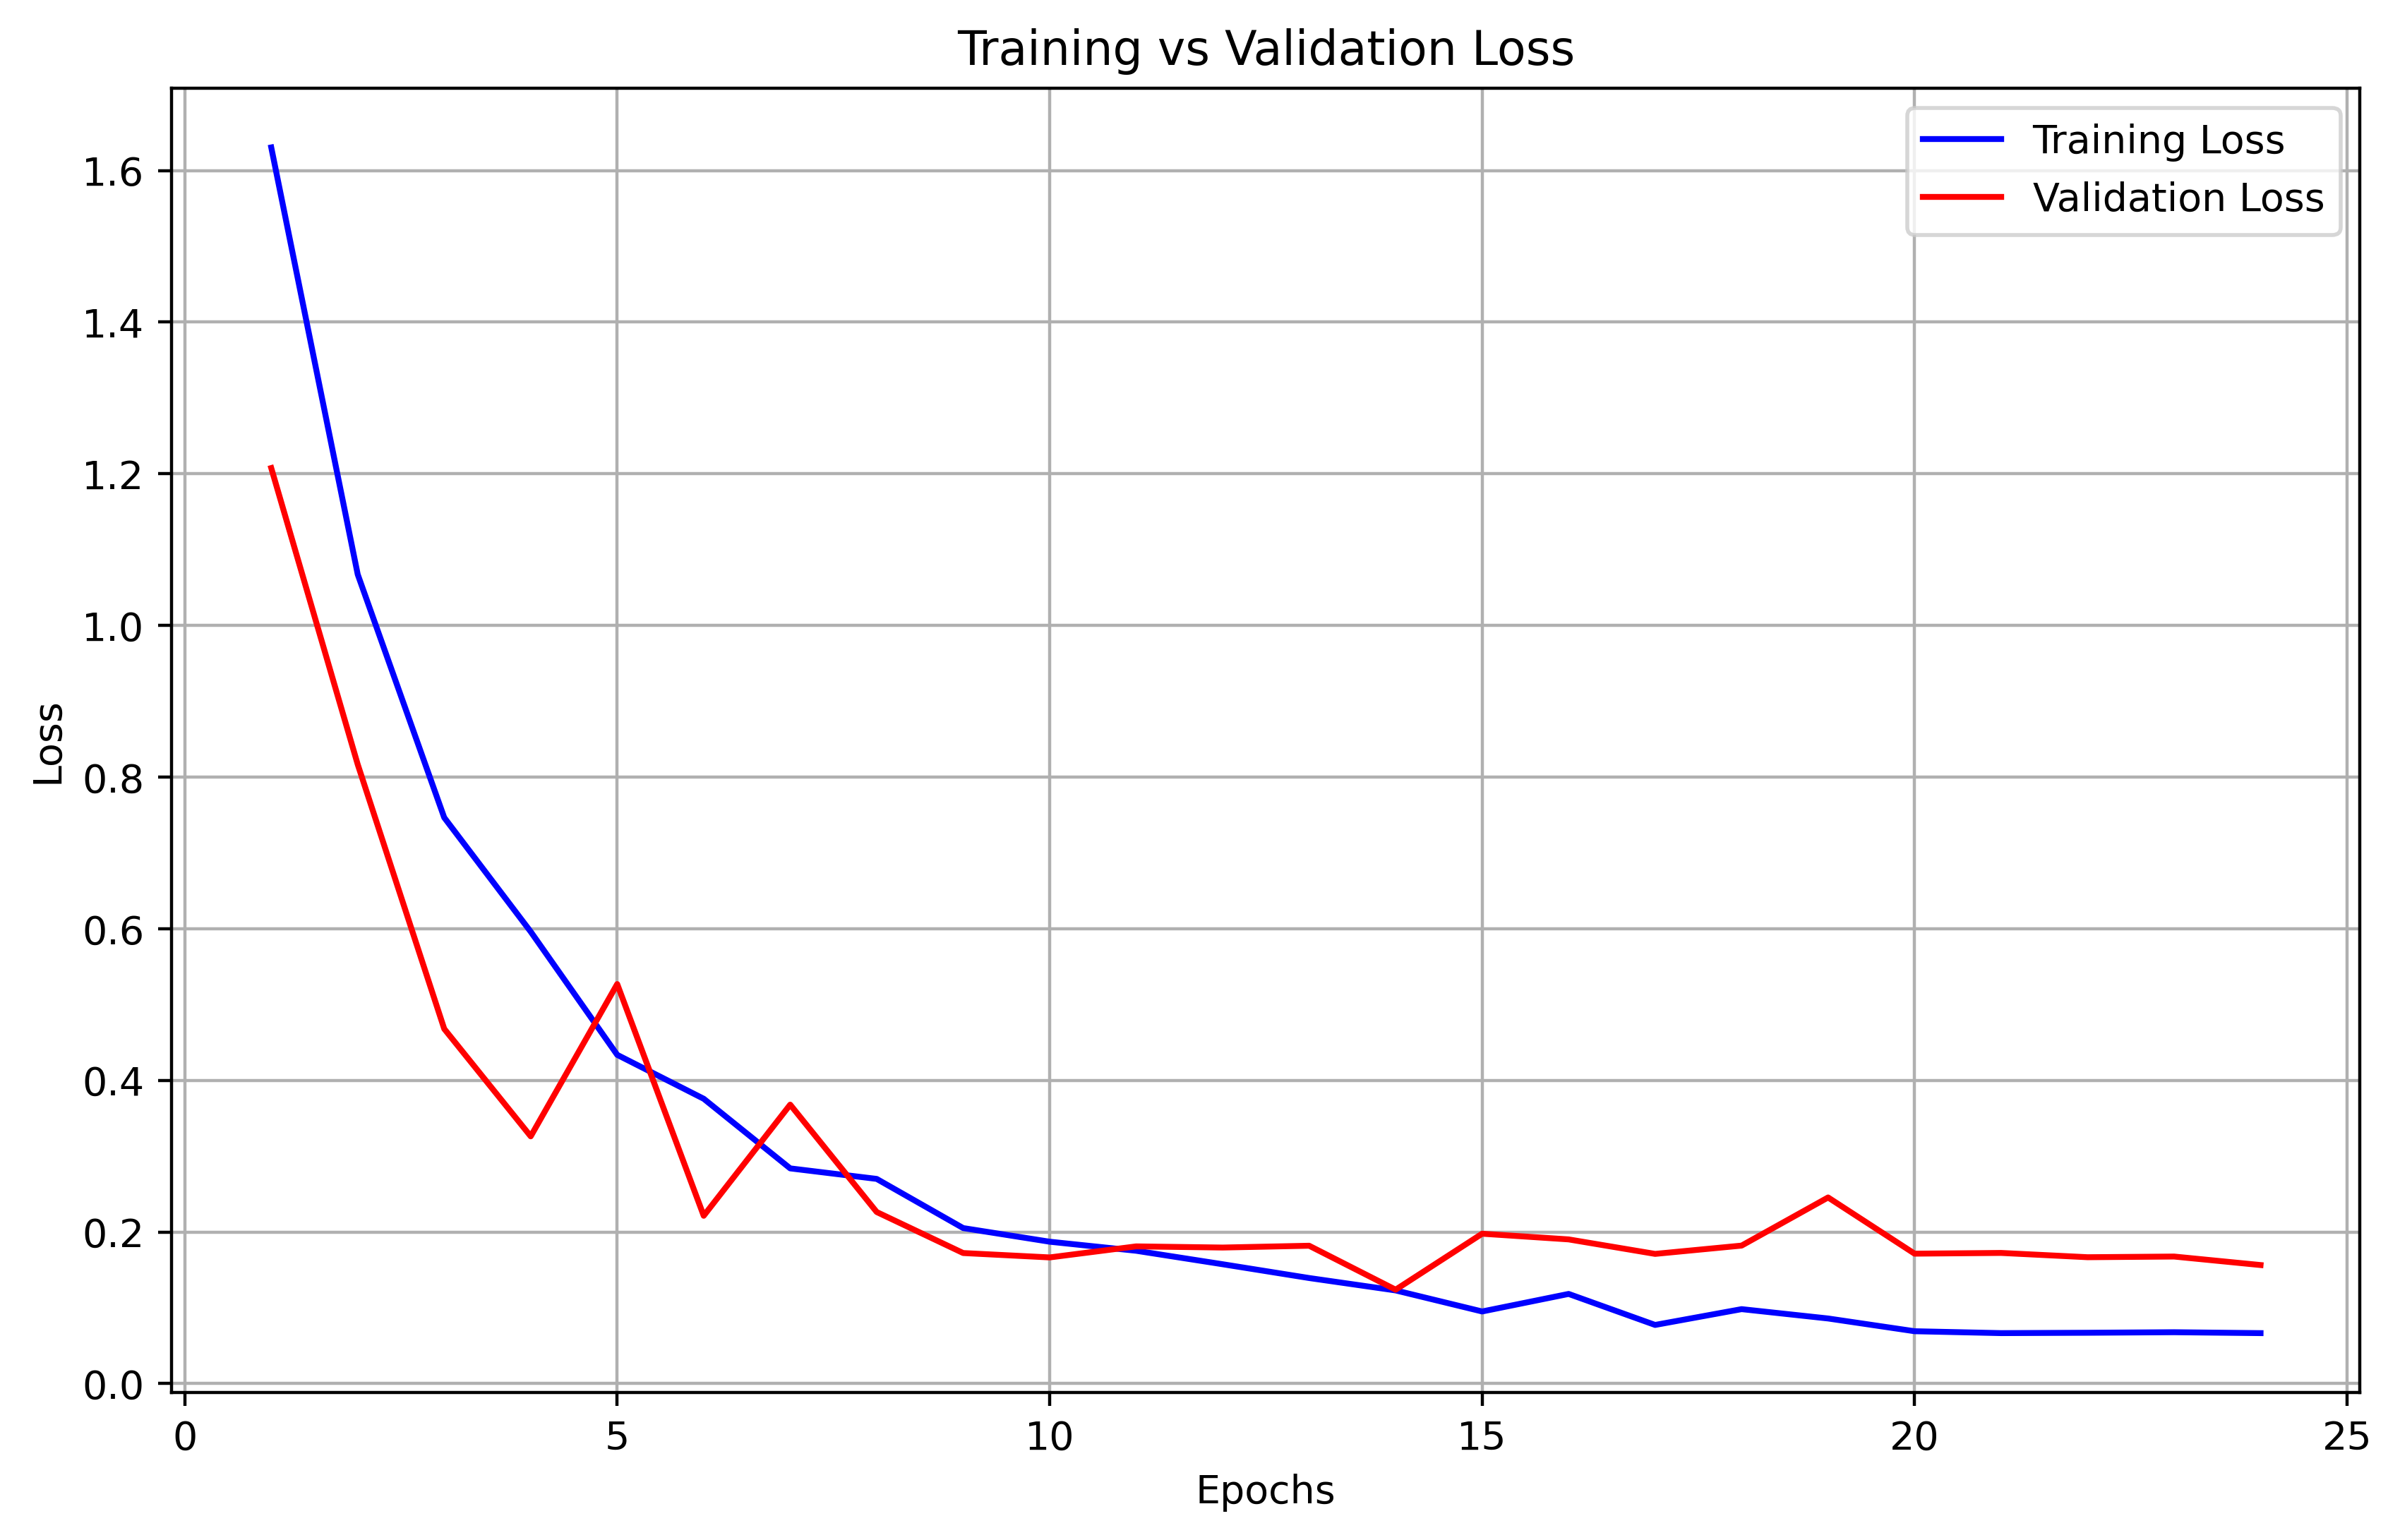

In [71]:
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(10, 6),dpi=400)
plt.plot(epochs, train_acc, 'b-', label='Training Loss')
plt.plot(epochs, val_acc, 'r-', label='Validation Loss')

# Since test accuracy is a single value (not per epoch), add it as a horizontal line
# plt.axhline(y=test_acc, color='g', linestyle='--', label=f'Test Accuracy ({test_acc:.4f})')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png', dpi=400, bbox_inches='tight')

plt.show()

In [249]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
accuracy_score(ytrue, yhat)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


0.9644012944983819

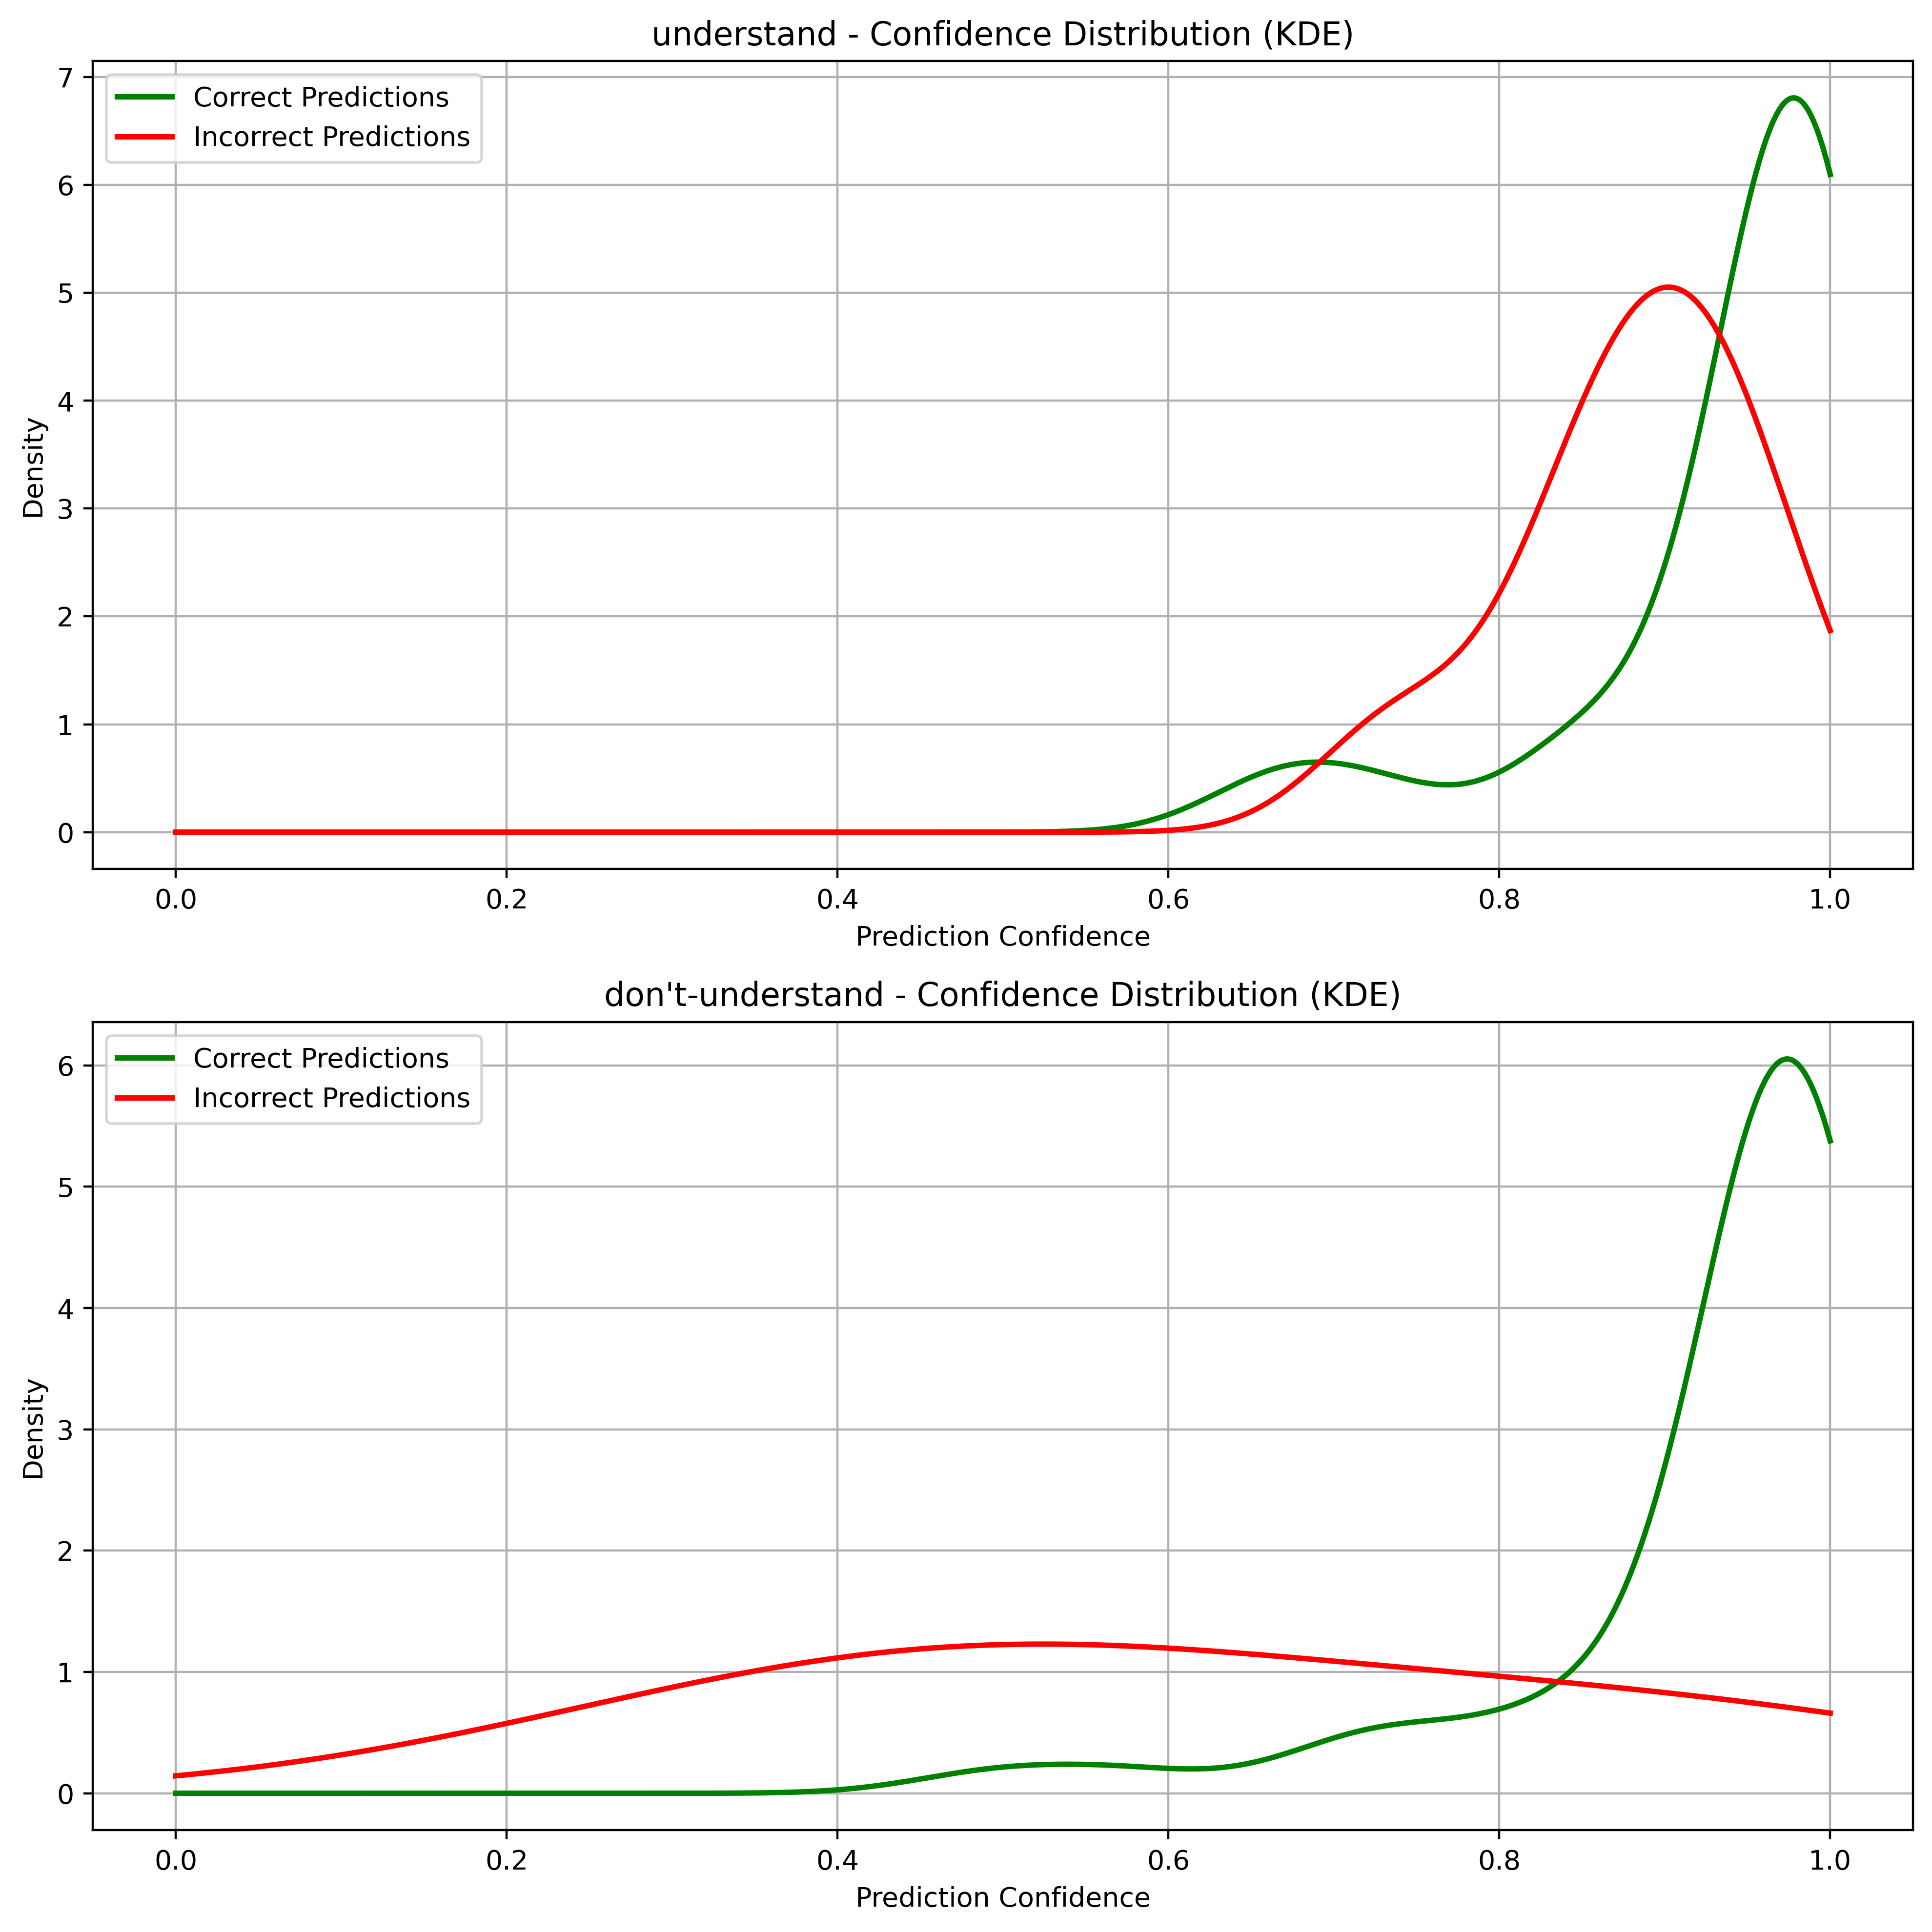

In [177]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

classes_to_plot = [11, 12]

plt.figure(figsize=(10, 5 * len(classes_to_plot)), dpi=400)

for i, class_idx in enumerate(classes_to_plot):
    class_mask = (y_true_labels == class_idx)

    correct_mask = class_mask & (y_pred_labels == y_true_labels)
    incorrect_mask = class_mask & (y_pred_labels != y_true_labels)

    correct_conf_class = confidences[correct_mask]
    incorrect_conf_class = confidences[incorrect_mask]

    plt.subplot(len(classes_to_plot), 1, i + 1)

    x_vals = np.linspace(0, 1, 1000)

    # KDE for correct predictions
    if len(correct_conf_class) > 1:
        kde_correct = gaussian_kde(correct_conf_class)
        y_vals_correct = kde_correct(x_vals)
        plt.plot(x_vals, y_vals_correct, color='g', lw=2, label='Correct Predictions')

    # KDE for incorrect predictions
    if len(incorrect_conf_class) > 1:
        kde_incorrect = gaussian_kde(incorrect_conf_class)
        y_vals_incorrect = kde_incorrect(x_vals)
        plt.plot(x_vals, y_vals_incorrect, color='r', lw=2, label='Incorrect Predictions')

    plt.title(f'{num_to_label[class_idx]} - Confidence Distribution (KDE)')
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('confidence_distribution_kde_density_classes_11_12.png', dpi=400, bbox_inches='tight')
plt.show()


#### Classification Report & Confusion Matrix Plots

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Total inference time: 0.4393 seconds
Average time per sample: 0.000711 seconds
Throughput: 1406.79 samples per second


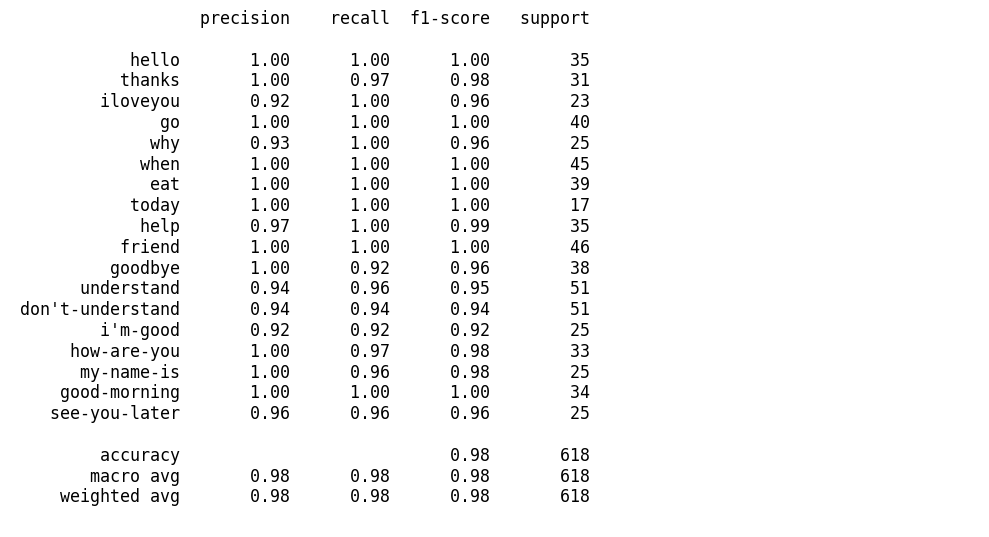

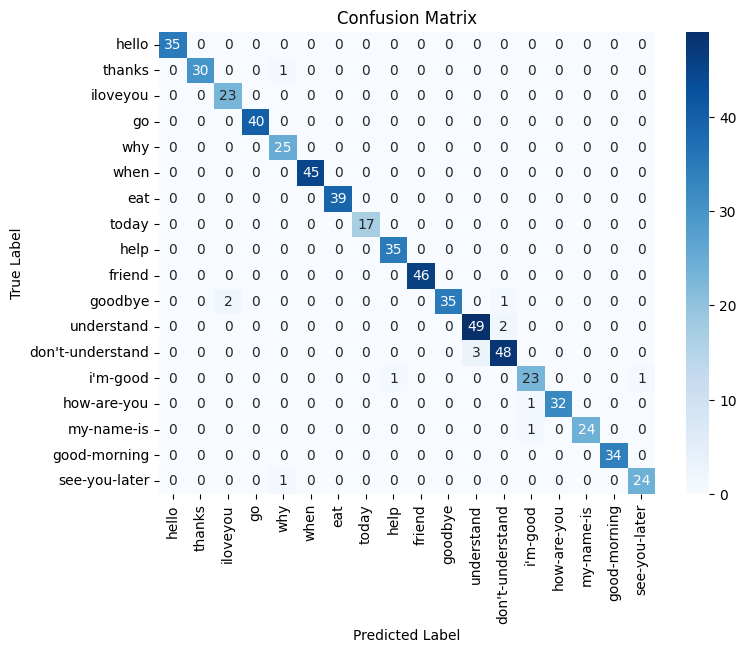

In [241]:
import time
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Start timer for inference ---
start_time = time.time()

# Run predictions (replace with your model's prediction method)
# Example: yhat = model.predict(X_test)
yhat = model.predict(X_test)

end_time = time.time()

# --- Calculate speed metrics ---
total_time = end_time - start_time
num_samples = len(X_test)
time_per_sample = total_time / num_samples
fps = num_samples / total_time  # frames/s or predictions/s

print(f"Total inference time: {total_time:.4f} seconds")
print(f"Average time per sample: {time_per_sample:.6f} seconds")
print(f"Throughput: {fps:.2f} samples per second")

# --- Convert predictions to discrete labels if needed ---
# If predictions are probabilities or logits
if isinstance(yhat, np.ndarray) and yhat.ndim > 1:
    yhat = np.argmax(yhat, axis=1)

# Convert ytrue to labels if it's one-hot encoded
if isinstance(ytrue, np.ndarray) and ytrue.ndim > 1:
    ytrue = np.argmax(ytrue, axis=1)

# --- Classification report ---
report = classification_report(ytrue, yhat, target_names=classes)

plt.figure(figsize=(10, 6))
plt.text(0.01, 1, report, fontsize=12, fontfamily='monospace',
         verticalalignment='top', wrap=True)
plt.axis('off')
plt.tight_layout()
plt.savefig('classification_report.png', dpi=300)
plt.show()

# --- Confusion matrix ---
cm = confusion_matrix(ytrue, yhat)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusionmatrix.png', dpi=400, bbox_inches='tight')
plt.show()


In [173]:
def weighted_avg_metric(class_list, metrics_dict, metric_name):
    total_metric = 0
    total_support = 0
    for cls in class_list:
        metric = metrics_dict[cls][metric_name.lower()]  # 'precision' or 'recall' lowercase keys
        support = metrics_dict[cls]['support']
        total_metric += metric * support
        total_support += support
    return total_metric / total_support if total_support > 0 else 0

# Define your gloss groups
dynamic_glosses = ['good-morning', "i'm-good", 'help', 'see-you-later', "don't-understand", 'understand', 'my-name-is', 'how-are-you']

# Static glosses are all others not in dynamic_glosses
static_glosses = [cls for cls in class_metrics.keys() if cls not in dynamic_glosses]

# Calculate weighted precision and recall for dynamic glosses
avg_precision_dynamic = weighted_avg_metric(dynamic_glosses, class_metrics, 'precision')
avg_recall_dynamic = weighted_avg_metric(dynamic_glosses, class_metrics, 'recall')

# Calculate weighted precision and recall for static glosses
avg_precision_static = weighted_avg_metric(static_glosses, class_metrics, 'precision')
avg_recall_static = weighted_avg_metric(static_glosses, class_metrics, 'recall')

print(f"Weighted average Precision for dynamic glosses: {avg_precision_dynamic:.4f}")
print(f"Weighted average Recall for dynamic glosses: {avg_recall_dynamic:.4f}")
print(f"Weighted average Precision for static glosses: {avg_precision_static:.4f}")
print(f"Weighted average Recall for static glosses: {avg_recall_static:.4f}")


Weighted average Precision for dynamic glosses: 0.9328
Weighted average Recall for dynamic glosses: 0.9343
Weighted average Precision for static glosses: 0.9832
Weighted average Recall for static glosses: 0.9757


In [169]:
import numpy as np

# Convert one-hot to label indices if needed
if isinstance(y_train[0], np.ndarray) and y_train[0].ndim > 0:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Map numeric labels to gloss names
train_labels_named = [num_to_label[label] for label in y_train_labels]

# Count dynamic and static samples
dynamic_count = sum(1 for gloss in train_labels_named if gloss in dynamic_glosses)
static_count = len(train_labels_named) - dynamic_count

print(f"Number of dynamic gloss samples in training set: {dynamic_count}")
print(f"Number of static gloss samples in training set: {static_count}")


Number of dynamic gloss samples in training set: 751
Number of static gloss samples in training set: 915


In [223]:
import cv2
import os

# Path where you want to save the video
save_dir = '/Users/badershalata/Documents/MP_Data/istudymscexample' # Change this to your desired folder
os.makedirs(save_dir, exist_ok=True)

# Output video filename
output_path = os.path.join(save_dir, 'output_video.mp4')

# Open webcam
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # 'XVID' is widely supported
fps = 20.0  # Frames per second
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

print("Press 'q' to stop recording.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Write the frame into the file
    out.write(frame)

    # Display the frame
    cv2.imshow('Recording', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Stopping recording.")
        break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Press 'q' to stop recording.
Stopping recording.


## Inputting raw video 30 frames and trying to extract and predict

### Here I am recording my self for raw video

In [82]:
import cv2

# Set up webcam
cap = cv2.VideoCapture(0)

# Get frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set output path
output_path = '/Users/badershalata/Documents/MP_Data/testing/dontunderstand.mp4'

# Define codec and VideoWriter object for 30 FPS
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (frame_width, frame_height))

print("🎥 Recording 30 frames (NO landmarks)...")

frame_count = 0
max_frames = 30  # Limit to 30 frames

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    # Flip for selfie-view
    # frame = cv2.flip(frame, 1)

    # Display live preview
    cv2.imshow('Recording (30 frames)', frame)

    # Save the frame
    out.write(frame)
    frame_count += 1

    # Allow early stop with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("⏹️ Interrupted early by user.")
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Recording complete. Saved to: {output_path}")


🎥 Recording 30 frames (NO landmarks)...
✅ Recording complete. Saved to: /Users/badershalata/Documents/MP_Data/testing/dontunderstand.mp4


### This outputs the same video but with drawings

In [1060]:
import cv2
import mediapipe as mp

# === MediaPipe modules ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
# === Input/output video paths ===
input_video_path = '/Users/badershalata/Documents/MP_Data/testing/rawvideo.mp4'            # 👈 Replace with your video file
output_video_path = '/Users/badershalata/Documents/MP_Data/testing/rawwithholistics1.mp4'   # 👈 Output file

# === Open input video ===
cap = cv2.VideoCapture(input_video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# === Process video ===
with mp_holistic.Holistic(static_image_mode=False, model_complexity=1) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_rgb.flags.writeable = False
        results = holistic.process(image_rgb)
        image_rgb.flags.writeable = True

        draw_styled_landmarks(frame, results)

        out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Styled output saved:", output_video_path)


I0000 00:00:1753359057.102818 6074216 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1753359057.210537 9263901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753359057.224795 9263901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753359057.226607 9263897 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753359057.227058 9263904 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753359057.227585 9263901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

✅ Styled output saved: /Users/badershalata/Documents/MP_Data/testing/rawwithholistics1.mp4


### Here I am extracting keypoints from the rawvideo

In [84]:
import cv2
import numpy as np
import mediapipe as mp

input_video_path = '/Users/badershalata/Documents/MP_Data/testing/dontunderstand.mp4'

mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(input_video_path)
keypoints_all = []

with mp_holistic.Holistic(static_image_mode=False, model_complexity=1) as holistic:
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(image_rgb)
        
        keypoints = extract_keypoints(results)
        keypoints_all.append(keypoints)
        
        frame_count += 1
        if frame_count % 10 == 0:
            print(f"Processed {frame_count} frames")
        
        if frame_count == 30:  # stop at 30 frames if you want
            break

cap.release()

keypoints_all = np.array(keypoints_all)
print("Extracted keypoints shape:", keypoints_all.shape)

I0000 00:00:1753964506.062400 16114783 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro


Processed 10 frames
Processed 20 frames
Processed 30 frames
Extracted keypoints shape: (30, 1662)


In [85]:
import numpy as np

# keypoints_all is shape (30, 1662)
# Add batch dimension to make it (1, 30, 1662)
input_data = np.expand_dims(keypoints_all, axis=0)  # shape: (1, 30, 1662)

# Predict (assuming your model outputs class probabilities)
predictions = model.predict(input_data)

reverse_label_map = {v: k for k, v in label_map.items()}

# Get predicted class index (for classification)
predicted_class = np.argmax(predictions, axis=1)
predicted_class_index = predicted_class[0]  # get integer from array
predicted_class_name = reverse_label_map[predicted_class_index]
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class name: understand


## Inputting raw video no frames specified (might or might not have multiple glosses!)

In [957]:
import cv2

# === Set up webcam ===
cap = cv2.VideoCapture(0)

# === Get frame dimensions ===
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# === Output path and writer ===
output_path = '/Users/badershalata/Documents/MP_Data/testing/long_recording.mp4'  # ✅ Change if needed
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (frame_width, frame_height))

print("🎥 Recording... Press 'q' to stop.")

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    # frame = cv2.flip(frame, 1)  # Flip for selfie view
    out.write(frame)
    cv2.imshow('Recording (Press q to stop)', frame)

    frame_count += 1
    if frame_count % 30 == 0:
        print(f"📸 Recorded {frame_count} frames...")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# === Clean up ===
cap.release()
out.release()
cv2.destroyAllWindows()

🎥 Recording... Press 'q' to stop.
📸 Recorded 30 frames...
📸 Recorded 60 frames...


In [959]:
import cv2
import numpy as np
import mediapipe as mp

# === Load MediaPipe Holistic ===
mp_holistic = mp.solutions.holistic
# === Open saved video ===
video_path = '/Users/badershalata/Documents/MP_Data/testing/long_recording.mp4'
cap = cv2.VideoCapture(video_path)

# === Initialize MediaPipe Holistic ===
with mp_holistic.Holistic(static_image_mode=False, model_complexity=1) as holistic:
    keypoints_list = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Flip if needed
        # frame = cv2.flip(frame, 1)

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_rgb.flags.writeable = False

        # Process with holistic
        results = holistic.process(image_rgb)

        # Extract keypoints
        keypoints = extract_keypoints(results)
        keypoints_list.append(keypoints)

        frame_count += 1
        if frame_count % 30 == 0:
            print(f"📦 Processed {frame_count} frames...")

# === Final keypoints array ===
all_keypoints = np.array(keypoints_list)  # shape: (num_frames, 1662)
print("✅ Extracted keypoints shape:", all_keypoints.shape)


I0000 00:00:1753627826.387562 9628916 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro


📦 Processed 30 frames...
📦 Processed 60 frames...
✅ Extracted keypoints shape: (66, 1662)


In [61]:
import tensorflow as tf  # or your framework
from tensorflow.keras.models import load_model

# === 2. Uniform sampling to 30 frames ===
def sample_to_30_frames(sequence):
    indices = np.linspace(0, len(sequence) - 1, 30).astype(int)
    return sequence[indices]

# Handle if the video has fewer than 30 frames
if len(all_keypoints) >= 30:
    sampled_keypoints = sample_to_30_frames(all_keypoints)
else:
    # Pad with zeros if too short
    pad_len = 30 - len(all_keypoints)
    pad = np.zeros((pad_len, all_keypoints.shape[1]))
    sampled_keypoints = np.vstack((all_keypoints, pad))

# === 3. Reshape to match model input ===
input_data = np.expand_dims(sampled_keypoints, axis=0)  # Shape: (1, 30, 1662)

# === 4. Predict ===
prediction = model.predict(input_data)  # Output shape: (1, num_classes)

# === 5. Interpret prediction ===
predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction)

print(f"\n🔮 Predicted class: {actions[predicted_class_index]} (Confidence: {confidence:.4f})")
# Assume prediction shape is (1, num_classes)
pred = prediction[0]  # get the array of probabilities for the single sample

print("🔍 Confidence scores for each gloss:")
for gloss, score in zip(actions, pred):
    print(f"{gloss:<15} : {score:.4f}")




NameError: name 'all_keypoints' is not defined

## 10. Uniform sampling evaluation

In [193]:
import cv2
import os
import time
import numpy as np
import mediapipe as mp

# === Actions (glosses) ===
actions = np.array([
    'hello', 'thanks', 'iloveyou', 'go', 'why', 'when', 'eat', 'today', 'help',
    'friend', 'goodbye', 'understand', "don't-understand",
    "i'm-good", 'how-are-you', 'my-name-is', 'good-morning', 'see-you-later'
])

# === Base directory for dataset ===
base_dir = '/Users/badershalata/Documents/MP_Data/testing'
os.makedirs(base_dir, exist_ok=True)

# === MediaPipe setup ===
mp_holistic = mp.solutions.holistic


# === Webcam capture ===
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(static_image_mode=False, model_complexity=1) as holistic:
    for gloss in actions:
        gloss_dir = os.path.join(base_dir, gloss)  # Keep lowercase as provided
        os.makedirs(gloss_dir, exist_ok=True)

        print(f"\n📂 Starting recordings for gloss: {gloss}")

        for vid_num in range(1, 21):  # 20 recordings
            frame_count = 0
            max_frames = np.random.randint(30, 100)  # random length

            # Create subfolder for this video
            vid_folder = os.path.join(gloss_dir, f"vid{vid_num:02d}")
            if os.path.exists(vid_folder):
                print(f"⚠️ Skipping {vid_folder} (already exists)")
                continue
            os.makedirs(vid_folder)

            # Countdown before recording
            for sec in range(3, 0, -1):
                ret, frame = cap.read()
                if not ret:
                    break
                text = f"Gloss: {gloss} | Start in {sec}..."
                cv2.putText(frame, text, (50, 200),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
                cv2.imshow('Recording...', frame)
                cv2.waitKey(300)

            print(f"🎥 Recording #{vid_num} for {gloss} ({max_frames} frames)")

            while frame_count < max_frames:
                ret, frame = cap.read()
                if not ret:
                    break

                # Process with MediaPipe
                image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image_rgb.flags.writeable = False
                results = holistic.process(image_rgb)

                # Extract keypoints
                keypoints = extract_keypoints(results)

                # Save keypoints for this frame
                frame_filename = os.path.join(
                    vid_folder, f"frame{frame_count:04d}.npy"
                )
                np.save(frame_filename, keypoints)

                # Show frame with info
                label_text = f"{gloss} | Vid {vid_num} | Frame {frame_count+1}/{max_frames}"
                cv2.putText(frame, label_text, (10, 40),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                cv2.imshow('Recording...', frame)

                frame_count += 1
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

print("\n✅ All recordings done.")
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1754909388.372306   16158 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1754909388.449794 1878265 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754909388.469700 1878264 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754909388.472472 1878269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754909388.472729 1878268 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754909388.472919 1878262 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp


📂 Starting recordings for gloss: hello
🎥 Recording #1 for hello (45 frames)
🎥 Recording #2 for hello (51 frames)
🎥 Recording #3 for hello (40 frames)
🎥 Recording #4 for hello (85 frames)
🎥 Recording #5 for hello (56 frames)
🎥 Recording #6 for hello (37 frames)
🎥 Recording #7 for hello (75 frames)
🎥 Recording #8 for hello (75 frames)
🎥 Recording #9 for hello (97 frames)
🎥 Recording #10 for hello (76 frames)
🎥 Recording #11 for hello (36 frames)
🎥 Recording #12 for hello (48 frames)
🎥 Recording #13 for hello (81 frames)
🎥 Recording #14 for hello (69 frames)
🎥 Recording #15 for hello (80 frames)
🎥 Recording #16 for hello (46 frames)
🎥 Recording #17 for hello (94 frames)
🎥 Recording #18 for hello (83 frames)
🎥 Recording #19 for hello (76 frames)
🎥 Recording #20 for hello (45 frames)

📂 Starting recordings for gloss: thanks
🎥 Recording #1 for thanks (70 frames)
🎥 Recording #2 for thanks (60 frames)
🎥 Recording #3 for thanks (33 frames)
🎥 Recording #4 for thanks (40 frames)
🎥 Recording #5 f

In [195]:
import os
import json
import numpy as np

# === Actions (glosses) ===
actions = np.array([
    'hello', 'thanks', 'iloveyou', 'go', 'why', 'when', 'eat', 'today', 'help',
    'friend', 'goodbye', 'understand', "don't-understand",
    "i'm-good", 'how-are-you', 'my-name-is', 'good-morning', 'see-you-later'
])

# Map gloss to numeric label
label_map = {label: num for num, label in enumerate(actions)}

# Base directory where all gloss folders are stored
base_dir = '/Users/badershalata/Documents/MP_Data/testing'

video_labels = {}

# Loop through each gloss folder
for gloss in os.listdir(base_dir):
    gloss_path = os.path.join(base_dir, gloss)
    if not os.path.isdir(gloss_path):
        continue

    # Check gloss is one of the actions (ignore any other folders)
    if gloss not in label_map:
        print(f"⚠️ Ignoring unknown folder: {gloss}")
        continue

    # Loop through each video folder inside gloss folder
    for vid_folder in os.listdir(gloss_path):
        vid_path = os.path.join(gloss_path, vid_folder)
        if os.path.isdir(vid_path) and vid_folder.startswith("vid"):
            key = f"{gloss}/{vid_folder}"
            video_labels[key] = label_map[gloss]

# Save mapping to JSON
labels_file = os.path.join(base_dir, "labels.json")
with open(labels_file, "w") as f:
    json.dump(video_labels, f, indent=4)

print(f"✅ Labels saved for {len(video_labels)} videos to {labels_file}")


✅ Labels saved for 360 videos to /Users/badershalata/Documents/MP_Data/testing/labels.json


In [203]:
import numpy as np
import os
from tensorflow.keras.models import load_model

base_dir = '/Users/badershalata/Documents/MP_Data/testing'

def sample_to_30_frames(sequence):
    indices = np.linspace(0, len(sequence) - 1, 30).astype(int)
    return sequence[indices]

def load_keypoints_from_folder(vid_folder_path):
    files = sorted([f for f in os.listdir(vid_folder_path) if f.endswith('.npy')])
    all_keypoints = []
    for file in files:
        keypoints = np.load(os.path.join(vid_folder_path, file))
        all_keypoints.append(keypoints)
    return np.array(all_keypoints)

true_labels = []
predicted_labels = []

# For accuracy per class:
class_correct = {label: 0 for label in actions}
class_total = {label: 0 for label in actions}

# For average frame length per gloss:
class_frame_lengths = {label: [] for label in actions}

for gloss in actions:
    gloss_dir = os.path.join(base_dir, gloss)
    if not os.path.exists(gloss_dir):
        print(f"⚠️ Directory {gloss_dir} does not exist, skipping.")
        continue

    vid_folders = [f for f in os.listdir(gloss_dir) if os.path.isdir(os.path.join(gloss_dir, f))]
    vid_folders = sorted(vid_folders)

    for vid in vid_folders:
        vid_folder_path = os.path.join(gloss_dir, vid)
        keypoints_seq = load_keypoints_from_folder(vid_folder_path)
        
        # Track original video length before sampling/padding
        original_len = len(keypoints_seq)
        class_frame_lengths[gloss].append(original_len)

        if original_len >= 30:
            sampled_keypoints = sample_to_30_frames(keypoints_seq)
        else:
            pad_len = 30 - original_len
            pad = np.zeros((pad_len, keypoints_seq.shape[1]))
            sampled_keypoints = np.vstack((keypoints_seq, pad))

        input_data = np.expand_dims(sampled_keypoints, axis=0)

        prediction = model.predict(input_data)
        predicted_class_index = np.argmax(prediction)
        predicted_label = actions[predicted_class_index]

        true_labels.append(gloss)
        predicted_labels.append(predicted_label)

        class_total[gloss] += 1
        if predicted_label == gloss:
            class_correct[gloss] += 1

        print(f"Video: {gloss}/{vid} | Predicted: {predicted_label} | Frames: {original_len}")

# Overall accuracy
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
accuracy = np.mean(true_labels == predicted_labels)
print(f"\n✅ Overall accuracy on dataset: {accuracy * 100:.2f}%\n")

# Accuracy per class and average frames
print("📊 Accuracy and average video length per class:")
for gloss in actions:
    if class_total[gloss] > 0:
        acc = class_correct[gloss] / class_total[gloss]
        avg_len = np.mean(class_frame_lengths[gloss])
        print(f"{gloss:<15}: Accuracy: {acc * 100:.2f}% ({class_correct[gloss]}/{class_total[gloss]}) | Avg frames: {avg_len:.1f}")
    else:
        print(f"{gloss:<15}: No samples")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Video: hello/vid01 | Predicted: hello | Frames: 45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Video: hello/vid02 | Predicted: hello | Frames: 51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Video: hello/vid03 | Predicted: hello | Frames: 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Video: hello/vid04 | Predicted: hello | Frames: 85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Video: hello/vid05 | Predicted: hello | Frames: 56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Video: hello/vid06 | Predicted: hello | Frames: 37
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Video: hello/vid07 | Predicted: hello | Frames: 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Video: hello/vid08 | Predicted: hello | Frames: 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Video: hello/vid09 | Predicted: hello | Frames: 97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Video: hello/vid10 | Predicted: hello | Frames: 76
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Video: hello/vid11 | Predicted: hello | Frames: 36
1/1 ━━━━━━━━━━━━━━━━━

## 11. Test in REAL TIME

In [59]:
import cv2
import numpy as np
import mediapipe as mp

# === Replace with your actual function/model/labels ===
# e.g., from model_utils import mediapipe_detection, draw_styled_landmarks, extract_keypoints
#       from model import model, actions

sequence = []
sentence = []
threshold = 0.9
res = np.array([])  # Initialize to avoid NameError

# Variables for consecutive frame check
consecutive_frames_required = 5
consistent_count = 0
last_action = None

cap = cv2.VideoCapture(0)

with mp.solutions.holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Extract keypoints
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep last 30 frames

        # Predict when we have 30 frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            confidence = res[np.argmax(res)]
            action = actions[np.argmax(res)]
            print(f"Predicted: {action} | Confidence: {confidence:.2f}")

            if confidence > threshold:
                if action == last_action:
                    consistent_count += 1
                else:
                    consistent_count = 1
                    last_action = action

                if consistent_count >= consecutive_frames_required:
                    if len(sentence) == 0 or action != sentence[-1]:
                        sentence.append(action)
            else:
                consistent_count = 0
                last_action = None

        # Keep last 5 predictions in sentence
        sentence = sentence[-5:]

        # Visualize sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the frame
        cv2.imshow('OpenCV Feed', image)

        # Exit condition
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


2025-08-04 13:28:09.744 python[95714:16253160] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1754303291.434432 16253160 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/opt/anaconda3/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted: goodbye | Confidence: 0.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: goodbye | Confidence: 0.85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: goodbye | Confidence: 0.76
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted: goodbye | Confidence: 0.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted: goodbye | Confidence: 0.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: see-you-later | Confidence: 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: see-you-later | Confidence: 0.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted: see-you-later | Confidence: 0.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: goodbye | Confidence: 0.57
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted: goodbye | Confidence: 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: goodbye | Confidence: 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: goodbye | Confidence: 0.82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: goodbye | Confidence

KeyboardInterrupt: 

In [1469]:
res

array([2.0875614e-02, 4.4815603e-01, 1.0135645e-01, 4.1773432e-01,
       6.6159428e-03, 1.1014380e-03, 3.9764959e-03, 3.1489701e-05,
       9.4050338e-05, 5.8070906e-05], dtype=float32)

In [135]:
out.release()
cv2.destroyAllWindows()


## 12. Saving Model and Full Architecture

In [60]:
model.save("signlanguagemodel_256.keras")

In [989]:
print(tf.__version__)


2.18.0


In [268]:
!python --version

Python 3.12.4


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 30, 1662)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 1662)  │  1,704,318 │ input_layer_2[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 30, 1662)  │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 30, 1662)  │          0 │ dropout_7[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 30, 1662)  │      3,324 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30, 128)   │    212,864 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 30, 128)   │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30, 1662)  │    214,398 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 30, 1662)  │          0 │ layer_normalizat… │
│                     │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 1662)  │      3,324 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 1662)  │  1,704,318 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 30, 1662)  │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 30, 1662)  │          0 │ dropout_10[0][0], │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 1662)  │      3,324 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30, 128)   │    212,864 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 30, 128)   │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30, 1662)  │    214,398 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 1662)  │          0 │ layer_normalizat… │
│                     │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 1662)  │      3,324 │ add_3[0][0]     

 Total params: 13,156,688 (50.19 MB)

 Trainable params: 4,385,562 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,771,126 (33.46 MB)

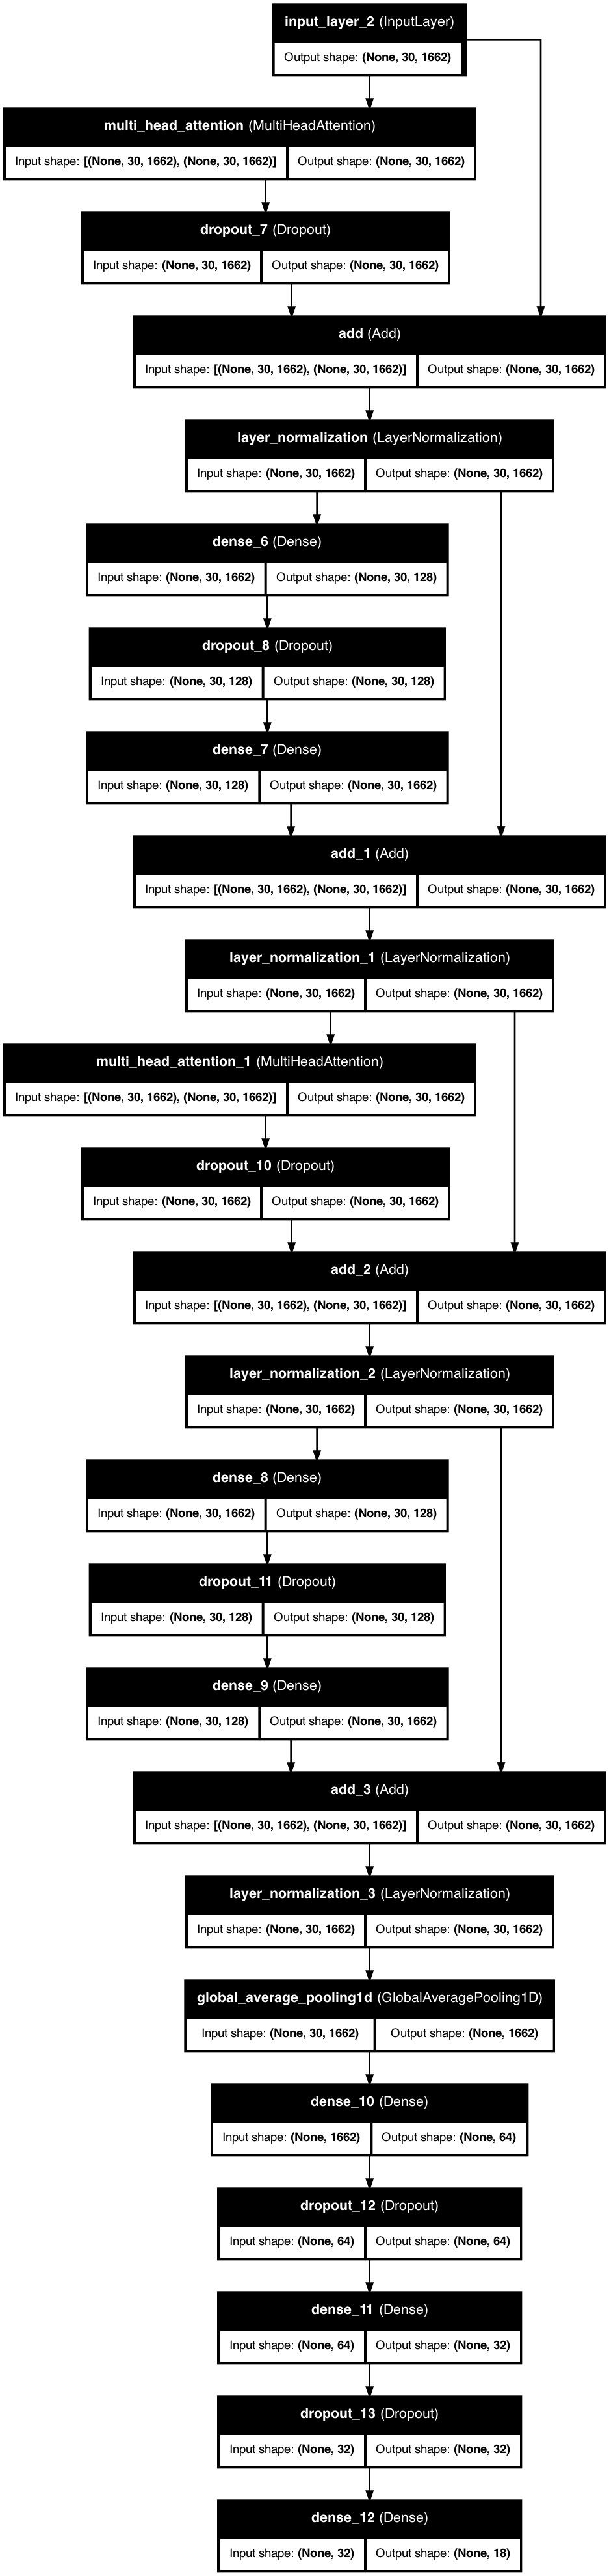

In [270]:
# Assuming your model is named 'model'
from tensorflow.keras.utils import plot_model

# Print summary in text form
model.summary()

# Save and display architecture diagram
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)
